In [1]:
import platform #os에 관계 없이 작동한다., 윈도우와 맥북 다 작동하는 함수이다.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# sns.set()

from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:
    print("It's unknown system. Hangul fonts are not supported!")
    
# plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = [12,6]

%matplotlib inline

In [2]:
# u : 유니코드를 나타낸다., 여러개의 비트를 갔다가 글자 한자를 갔다가 처리할 수 잇게끔 단위를 구별해서 처리할 수 있도록 한다.  
# u : 그래로 해석을 하기 위해서 쓰는 함수이다.  

text_0 = u'한국어 분석을 시작합니다. 재미있어요'
text_1 = u'나는 이제 너 없이도 너를 좋아할 수 있다.'
text_2 = u'순간이 시간이 되고, 시간이 세월이 되고, 세월은 추억이 된다.'
text_3 = u'''
    자신의 능력을 감추지 마라. 
    재능은 쓰라고 주어진 것이다. 
    그늘속의 해시계가 무슨 소용이랴.'
'''
text_4 = u'''
    If I only had an hour to chop down a tree, 
    I would spend the first 45 minutes sharpening my axe.
    만일 내게 나무를 베기 위해 한 시간만 주어진다면, 
    우선 나는 도끼를 가는데 45분을 쓸 것이다.'
    - 에이브러햄 링컨
'''
text_5 = u'''
아름답지만 다소 복잡하기도한 한국어는 전세계에서 13번째로 많이 사용되는 언어입니다.
KoNLPy는 파이썬 프로그래밍 언어로 사용할 수 있도록 만들어졌는데, 
그것은 파이썬이 간결하고 우아한 문법구조, 강력한 스트링 연산 기능을 가지고 있을 뿐 아니라 
크롤링, 웹프로그래밍, 그리고 데이터 분석을 수행할 수 있는 다양한 패키지를 사용할 수 있는 언어이기 때문입니다.
'''

text_6 = u'''
하늘아래 땅이있고 그위에 내가있으니
어디인들 이내몸 둘곳이야 없으리
하루해가 저문다고 울터이냐 그리도 내가 작더냐
별이 지는 저 산넘어 내 그리 쉬어 가리라
바람아 불어라 이내몸을 날려 주려마
하늘아 구름아 내몸 실어 떠나 가련다

해가지고 달이뜨고 그안에 내가숨쉬니
어디인들 이내몸 갈곳이야 없으리
작은것을 사랑하며 살터이다 친구를 사랑하리라
말이없는 저들녘에 내님을 그려보련다
바람아 불어라 이내몸을 날려주려마
하늘아 구름아 내몸실어 떠나가련다
바람아 불어라 이내몸을 날려주려마
하늘아 구름아 내몸실어 떠나가련다
'''

cool_sentences = [ text_0, text_1, text_2, text_3, text_4, text_5, text_6 ]

In [12]:
text_y = u'''존경하고 사랑하는 국민 여러분,
750만 재외동포 여러분,
그리고 자유를 사랑하는 세계 시민 여러분,

저는 이 나라를 자유민주주의와 시장경제 체제를 기반으로 국민이 진정한 주인인 나라로 재건하고, 국제사회에서 책임과 역할을 다하는 나라로 만들어야 하는 시대적 소명을 갖고 오늘 이 자리에 섰습니다.

역사적인 자리에 함께해 주신 국민 여러분께 감사드립니다.

문재인, 박근혜 전 대통령, 그리고 할리마 야콥 싱가포르 대통령, 포스탱 아르샹쥬 투아데라 중앙아프리카공화국 대통령, 왕치산 중국 국가부주석, 메가와티 수카르노푸트리 인도네시아 전 대통령, 더글러스 엠호프 해리스 미국 부통령 부군, 조지 퓨리 캐나다 상원의장, 하야시 요시마사 일본 외무상을 비롯한 세계 각국의 경축 사절과 내외 귀빈 여러분께도 깊이 감사드립니다.

이 자리를 빌려 지난 2년간 코로나 팬데믹을 극복하는 과정에서 큰 고통을 감내해주신 국민 여러분께 경의를 표합니다.
그리고 헌신해주신 의료진 여러분께도 감사드립니다.

존경하는 국민 여러분,
세계 시민 여러분,

지금 전 세계는 팬데믹 위기, 교역 질서의 변화와 공급망의 재편, 기후 변화, 식량과 에너지 위기, 분쟁의 평화적 해결의 후퇴 등 어느 한 나라가 독자적으로,  또는 몇몇 나라만 참여해서 해결하기 어려운 난제들에 직면해 있습니다.

다양한 위기가 복합적으로 인류 사회에 어두운 그림자를 드리우고 있는 것입니다.

또한 우리나라를 비롯한 많은 나라들이 국내적으로 초저성장과 대규모 실업, 양극화의 심화와 다양한 사회적 갈등으로 인해 공동체의 결속력이 흔들리고 와해되고 있습니다.

한편, 이러한 문제들을 해결해야 하는 정치는 이른바 민주주의의 위기로 인해 제 기능을 하지 못하고 있습니다.

가장 큰 원인으로 지목되는 것이 바로 반지성주의입니다.

견해가 다른 사람들이 서로의 입장을 조정하고 타협하기 위해서는 과학과 진실이 전제되어야 합니다.
그것이 민주주의를 지탱하는 합리주의와 지성주의입니다.

국가 간, 국가 내부의 지나친 집단적 갈등에 의해 진실이 왜곡되고, 각자가 보고 듣고 싶은 사실만을 선택하거나 다수의 힘으로 상대의 의견을 억압하는 반지성주의가 민주주의를 위기에 빠뜨리고 민주주의에 대한 믿음을 해치고 있습니다.
이러한 상황이 우리가 처해있는 문제의 해결을 더 어렵게 만들고 있습니다.

그러나 우리는 할 수 있습니다.
역사를 돌이켜 보면 우리 국민은 많은 위기에 처했지만 그럴 때마다 국민 모두 힘을 합쳐 지혜롭게, 또 용기있게 극복해 왔습니다.

저는 이 순간 이러한 위기를 극복하는 책임을 부여받게 된 것을 감사한 마음으로 받아들이고, 우리 위대한 국민과 함께 당당하게 헤쳐 나갈 수 있다고 확신합니다.

또 세계 시민과 힘을 합쳐 국내외적인 위기와 난제들을 해결해 나갈 수 있다고 믿습니다.

존경하는 국민 여러분,
세계 시민 여러분,

저는 이 어려움을 해결해 나가기 위해서 우리가 보편적 가치를 공유하는 것이 매우 중요하다고 생각합니다.

그것은 바로 ‘자유’입니다.
우리는 자유의 가치를 제대로, 그리고 정확하게 인식해야 합니다.
자유의 가치를 재발견해야 합니다.

인류 역사를 돌이켜보면 자유로운 정치적 권리, 자유로운 시장이 숨 쉬고 있던 곳은 언제나 번영과 풍요가 꽃 피었습니다.

번영과 풍요, 경제적 성장은 바로 자유의 확대입니다.

자유는 보편적 가치입니다.
우리 사회 모든 구성원이 자유 시민이 되어야 하는 것입니다.
어떤 개인의 자유가 침해되는 것이 방치된다면 우리 공동체 구성원 모두의 자유마저 위협받게 됩니다.

자유는 결코 승자독식이 아닙니다.
자유 시민이 되기 위해서는 일정한 수준의 경제적 기초, 그리고 공정한 교육과 문화의 접근 기회가 보장되어야 합니다.
이런 것 없이 자유 시민이라고 할 수 없습니다.

어떤 사람의 자유가 유린되거나 자유 시민이 되는데 필요한 조건을 충족하지 못한다면 모든 자유 시민은 연대해서 도와야 합니다.

그리고 개별 국가뿐 아니라 국제적으로도 기아와 빈곤, 공권력과 군사력에 의한 불법 행위로 개인의 자유가 침해되고 자유 시민으로서의 존엄한 삶이 유지되지 않는다면 모든 세계 시민이 자유 시민으로서 연대하여 도와야 하는 것입니다.

모두가 자유 시민이 되기 위해서는 공정한 규칙을 지켜야 하고, 연대와 박애의 정신을 가져야 합니다.

존경하는 국민 여러분,

국내 문제로 눈을 돌려 제가 중요하게 생각하는 방향에 대해 말씀드리겠습니다.

우리나라는 지나친 양극화와 사회 갈등이 자유와 민주주의를 위협할 뿐 아니라 사회 발전의 발목을 잡고 있습니다.

저는 이 문제를 도약과 빠른 성장을 이룩하지 않고는 해결하기 어렵다고 생각합니다.

빠른 성장 과정에서 많은 국민이 새로운 기회를 찾을 수 있고, 사회 이동성을 제고함으로써 양극화와 갈등의 근원을 제거할 수 있습니다.

도약과 빠른 성장은 오로지 과학과 기술, 그리고 혁신에 의해서만 이뤄낼 수 있는 것입니다.

과학과 기술, 그리고 혁신은 우리의 자유민주주의를 지키고 우리의 자유를 확대하며 우리의 존엄한 삶을 지속 가능하게 할 것입니다.

과학과 기술, 그리고 혁신은 우리나라 혼자만의 노력으로는 달성하기 어렵습니다.

자유와 창의를 존중함으로써 과학 기술의 진보와 혁신을 이뤄낸 많은 나라들과 협력하고 연대해야만 합니다.

존경하는 국민 여러분,
세계 시민 여러분,

자유민주주의는 평화를 만들어내고, 평화는 자유를 지켜줍니다.
그리고 평화는 자유와 인권의 가치를 존중하는 국제사회와의 연대에 의해 보장이 됩니다.

일시적으로 전쟁을 회피하는 취약한 평화가 아니라 자유와 번영을 꽃피우는 지속 가능한 평화를 추구해야 합니다.

전 세계 어떤 곳도 자유와 평화에 대한 위협에서 자유롭지 못합니다.
지금 한반도와 동북아의 평화도 마찬가지입니다.

저는 한반도뿐 아니라 아시아와 세계의 평화를 위협하는 북한의 핵 개발에 대해서도 그 평화적 해결을 위해 대화의 문을 열어놓겠습니다.

그리고 북한이 핵 개발을 중단하고 실질적인 비핵화로 전환한다면 국제사회와 협력하여 북한 경제와 북한 주민의 삶의 질을 획기적으로 개선할 수 있는 담대한 계획을 준비하겠습니다.

북한의 비핵화는 한반도에 지속 가능한 평화를 가져올 뿐 아니라 아시아와 전 세계의 평화와 번영에도 크게 기여할 것입니다.

사랑하고 존경하는 국민 여러분,

지금 우리는 세계 10위권의 경제 대국 그룹에 들어가 있습니다.
그러므로 우리는 자유와 인권의 가치에 기반한 보편적 국제 규범을 적극 지지하고 수호하는데 글로벌 리더 국가로서의 자세를 가져야 합니다.

우리나라뿐 아니라 세계 시민 모두의 자유와 인권을 지키고 확대하는데 더욱 주도적인 역할을 해야 합니다.
국제사회도 대한민국에 더욱 큰 역할을 기대하고 있음이 분명합니다.

지금 우리나라는 국내 문제와 국제 문제를 분리할 수 없습니다.
국제사회가 우리에게 기대하는 역할을 주도적으로 수행할 때 국내 문제도 올바른 해결 방향을
찾을 수 있는 것입니다.

저는 자유, 인권, 공정, 연대의 가치를 기반으로 국민이 진정한 주인인 나라, 국제사회에서 책임을 다하고 존경받는 나라를 위대한 국민 여러분과 함께 반드시 만들어 나가겠습니다.

감사합니다.
'''

In [3]:
selected_text = cool_sentences[-1]
print(selected_text.strip())

하늘아래 땅이있고 그위에 내가있으니
어디인들 이내몸 둘곳이야 없으리
하루해가 저문다고 울터이냐 그리도 내가 작더냐
별이 지는 저 산넘어 내 그리 쉬어 가리라
바람아 불어라 이내몸을 날려 주려마
하늘아 구름아 내몸 실어 떠나 가련다

해가지고 달이뜨고 그안에 내가숨쉬니
어디인들 이내몸 갈곳이야 없으리
작은것을 사랑하며 살터이다 친구를 사랑하리라
말이없는 저들녘에 내님을 그려보련다
바람아 불어라 이내몸을 날려주려마
하늘아 구름아 내몸실어 떠나가련다
바람아 불어라 이내몸을 날려주려마
하늘아 구름아 내몸실어 떠나가련다


In [4]:
# 프린트만하면 이런게 나온다, 이런것들을 정리하고 본다.

selected_text = selected_text.replace('\n', ' ')
selected_text = selected_text.replace('\t', ' ')
selected_text = selected_text.replace('  ', ' ')
selected_text = selected_text.strip()
selected_text

'하늘아래 땅이있고 그위에 내가있으니 어디인들 이내몸 둘곳이야 없으리 하루해가 저문다고 울터이냐 그리도 내가 작더냐 별이 지는 저 산넘어 내 그리 쉬어 가리라 바람아 불어라 이내몸을 날려 주려마 하늘아 구름아 내몸 실어 떠나 가련다 해가지고 달이뜨고 그안에 내가숨쉬니 어디인들 이내몸 갈곳이야 없으리 작은것을 사랑하며 살터이다 친구를 사랑하리라 말이없는 저들녘에 내님을 그려보련다 바람아 불어라 이내몸을 날려주려마 하늘아 구름아 내몸실어 떠나가련다 바람아 불어라 이내몸을 날려주려마 하늘아 구름아 내몸실어 떠나가련다'

In [5]:
print('문자열 총 길이 : {}           '.format(len(selected_text)))
print('문자열 총 길이 : {} (공백제외)'.format(len(selected_text.replace(' ',''))))
print('문자열 단어 수 : {}           '.format(len(selected_text.split())))

문자열 총 길이 : 287           
문자열 총 길이 : 222 (공백제외)
문자열 단어 수 : 66           


In [6]:
print('문자열 단어 발생 빈도 ')
frequency = dict()

for word in selected_text.split(' '):
    if word in frequency:
        frequency[word] += 1
    else:
        frequency[word] = 1
        
word = list(frequency.keys())
word_cnt = list(frequency.values())

frequency

문자열 단어 발생 빈도 


{'하늘아래': 1,
 '땅이있고': 1,
 '그위에': 1,
 '내가있으니': 1,
 '어디인들': 2,
 '이내몸': 2,
 '둘곳이야': 1,
 '없으리': 2,
 '하루해가': 1,
 '저문다고': 1,
 '울터이냐': 1,
 '그리도': 1,
 '내가': 1,
 '작더냐': 1,
 '별이': 1,
 '지는': 1,
 '저': 1,
 '산넘어': 1,
 '내': 1,
 '그리': 1,
 '쉬어': 1,
 '가리라': 1,
 '바람아': 3,
 '불어라': 3,
 '이내몸을': 3,
 '날려': 1,
 '주려마': 1,
 '하늘아': 3,
 '구름아': 3,
 '내몸': 1,
 '실어': 1,
 '떠나': 1,
 '가련다': 1,
 '해가지고': 1,
 '달이뜨고': 1,
 '그안에': 1,
 '내가숨쉬니': 1,
 '갈곳이야': 1,
 '작은것을': 1,
 '사랑하며': 1,
 '살터이다': 1,
 '친구를': 1,
 '사랑하리라': 1,
 '말이없는': 1,
 '저들녘에': 1,
 '내님을': 1,
 '그려보련다': 1,
 '날려주려마': 2,
 '내몸실어': 2,
 '떠나가련다': 2}

In [ ]:
# m = min(word_cnt)
# m

In [ ]:
# word_cnt.index(m)

In [ ]:
# word.pop(word_cnt.index(m))

In [7]:
while bool(word):
    m = min(word_cnt)
    print(m, end=' ')
    print(word.pop(word_cnt.index(m)))
# print(word.pop(word_cnt.index(m)), end=' : ')
    print(word)
    word_cnt.remove(m)

1 하늘아래
['땅이있고', '그위에', '내가있으니', '어디인들', '이내몸', '둘곳이야', '없으리', '하루해가', '저문다고', '울터이냐', '그리도', '내가', '작더냐', '별이', '지는', '저', '산넘어', '내', '그리', '쉬어', '가리라', '바람아', '불어라', '이내몸을', '날려', '주려마', '하늘아', '구름아', '내몸', '실어', '떠나', '가련다', '해가지고', '달이뜨고', '그안에', '내가숨쉬니', '갈곳이야', '작은것을', '사랑하며', '살터이다', '친구를', '사랑하리라', '말이없는', '저들녘에', '내님을', '그려보련다', '날려주려마', '내몸실어', '떠나가련다']
1 땅이있고
['그위에', '내가있으니', '어디인들', '이내몸', '둘곳이야', '없으리', '하루해가', '저문다고', '울터이냐', '그리도', '내가', '작더냐', '별이', '지는', '저', '산넘어', '내', '그리', '쉬어', '가리라', '바람아', '불어라', '이내몸을', '날려', '주려마', '하늘아', '구름아', '내몸', '실어', '떠나', '가련다', '해가지고', '달이뜨고', '그안에', '내가숨쉬니', '갈곳이야', '작은것을', '사랑하며', '살터이다', '친구를', '사랑하리라', '말이없는', '저들녘에', '내님을', '그려보련다', '날려주려마', '내몸실어', '떠나가련다']
1 그위에
['내가있으니', '어디인들', '이내몸', '둘곳이야', '없으리', '하루해가', '저문다고', '울터이냐', '그리도', '내가', '작더냐', '별이', '지는', '저', '산넘어', '내', '그리', '쉬어', '가리라', '바람아', '불어라', '이내몸을', '날려', '주려마', '하늘아', '구름아', '내몸', '실어', '떠나', '가련다', '해가지고', '달이뜨고', '그안에', '내가숨쉬니', '갈곳이야', '작은것을', '사랑하며', '살터이다', 

In [8]:
selected_text

'하늘아래 땅이있고 그위에 내가있으니 어디인들 이내몸 둘곳이야 없으리 하루해가 저문다고 울터이냐 그리도 내가 작더냐 별이 지는 저 산넘어 내 그리 쉬어 가리라 바람아 불어라 이내몸을 날려 주려마 하늘아 구름아 내몸 실어 떠나 가련다 해가지고 달이뜨고 그안에 내가숨쉬니 어디인들 이내몸 갈곳이야 없으리 작은것을 사랑하며 살터이다 친구를 사랑하리라 말이없는 저들녘에 내님을 그려보련다 바람아 불어라 이내몸을 날려주려마 하늘아 구름아 내몸실어 떠나가련다 바람아 불어라 이내몸을 날려주려마 하늘아 구름아 내몸실어 떠나가련다'

In [9]:
from konlpy.tag import Kkma
from konlpy.tag import Hannanum
from konlpy.tag import Twitter
from konlpy.tag import Okt
from konlpy.tag import Komoran

from datetime import datetime

In [10]:
chk_times=  list()

In [13]:
kkma = Kkma()

start = datetime.now()
kkma.pos(text_y)
end = datetime.now()

elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)
elapsed_ms = int(elapsed.total_seconds()*1000)
print('총 계산 시간: %dms' %elapsed_ms)

chk_times.append(elapsed_ms)

총 계산 시간: 0:00:34.939962
총 계산 시간: 34939ms


In [14]:
hannanum = Hannanum()

start = datetime.now()
hannanum.pos(text_y)
end = datetime.now()

elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)
elapsed_ms = int(elapsed.total_seconds()*1000)
print('총 계산 시간: %dms' %elapsed_ms)

chk_times.append(elapsed_ms)

총 계산 시간: 0:00:04.492631
총 계산 시간: 4492ms


In [15]:
t = Twitter()

start = datetime.now()
t.pos(text_y)
end = datetime.now()

elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)
elapsed_ms = int(elapsed.total_seconds()*1000)
print('총 계산 시간: %dms' %elapsed_ms)

chk_times.append(elapsed_ms)

C:\Users\82106\anaconda3\lib\site-packages\konlpy\tag\_okt.py:17: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


총 계산 시간: 0:00:15.070948
총 계산 시간: 15070ms


In [16]:
okt = Okt()

start = datetime.now()
okt.pos(text_y)
end = datetime.now()

elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)
elapsed_ms = int(elapsed.total_seconds()*1000)
print('총 계산 시간: %dms' %elapsed_ms)

chk_times.append(elapsed_ms)

총 계산 시간: 0:00:00.481247
총 계산 시간: 481ms


In [17]:
komoran = Komoran()

start = datetime.now()
komoran.pos(text_y)
end = datetime.now()

elapsed = end - start
print('총 계산 시간: ', end='');   print(elapsed)
elapsed_ms = int(elapsed.total_seconds()*1000)
print('총 계산 시간: %dms' %elapsed_ms)

chk_times.append(elapsed_ms)

총 계산 시간: 0:00:00.422289
총 계산 시간: 422ms


In [18]:
import matplotlib.pyplot as plt

In [19]:
chk_times

[34939, 4492, 15070, 481, 422]

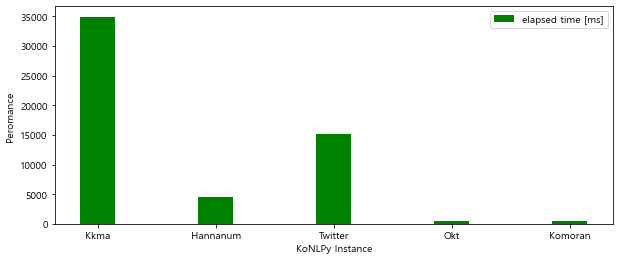

In [20]:
t = range(len(chk_times))
y = chk_times
n = [ 'Kkma', 'Hannanum', 'Twitter', 'Okt','Komoran']

plt.figure(figsize=(10,4))
plt.bar(t, y, color='g', width=0.3, label='elapsed time [ms]')
plt.xlabel('KoNLPy Instance')
plt.ylabel('Peromance ')
plt.legend()
plt.xticks(t,  n)
plt.show()
